# modelos

In [1]:
import pandas as pd
import numpy as np

from turtle import color
import plotly.graph_objects as go
import plotly.express as px

import matplotlib.pyplot as plt
import matplotlib_inline
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller

from sklearn.model_selection import train_test_split as skl

from sklearn.preprocessing import PolynomialFeatures, StandardScaler ### preprocesar los datos
from sklearn.model_selection import cross_val_score #### NO SE USA
from sklearn.model_selection import GridSearchCV #### Validación cruzada
#pip install pmdarima --quiet
import pmdarima as pm

from statsmodels.tsa.statespace.sarimax import SARIMAX

C:\Users\miavila\AppData\Roaming\Python\Python39\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [3]:
kernel='C:/Users/miavila/Documents/U/PROYECTO P/basef/'
df=pd.read_excel(kernel + '4.total agru_hour.xlsx')

In [4]:
df=pd.DataFrame(df,columns=['FechaT', 'Fecha', 'Operación_N', 'sumRecibidas', 'festivo','festividades',
       'MesN', 'Dia_MesN', 'Dia_SemN', 'Hora24'])

In [5]:
UPN=df[df['Operación_N']=='U_Persona_Natural']
UPN=UPN.sort_values(by='FechaT') #ascending=False 
UPN.index = range(UPN.shape[0])

In [6]:
P=df[df['Operación_N']=='Pensilvania']
#
#
BIO=df[df['Operación_N']=='Biometria']
CON=df[df['Operación_N']=='Conservacion']
EP=df[df['Operación_N']=='Ejecutivo Premium']
EB=df[df['Operación_N']=='Especializados Bloqueos']
EBF=df[df['Operación_N']=='Especializados Bloqueos F']
ME=df[df['Operación_N']=='Moneda Extranjera - Home']
OR=df[df['Operación_N']=='Orquestador']
PJH=df[df['Operación_N']=='Persona Juridica - Home']
#
#
CAV=df[df['Operación_N']=='CAV']
VIP=df[df['Operación_N']=='VIP PJ']

# Ajuste el tipo de dato ind64 a ind32.

In [ ]:
UPN['sumRecibidas'] = UPN['sumRecibidas'].astype(np.int32)
UPN['festivo'] = UPN['festivo'].astype(np.int32)
UPN['MesN'] = UPN['MesN'].astype(np.int32)
UPN['Dia_MesN'] = UPN['Dia_MesN'].astype(np.int32)
UPN['Dia_SemN'] = UPN['Dia_SemN'].astype(np.int32)
UPN['Hora24']=UPN['Hora24'].astype(np.int32)
UPN['Jornada5']=UPN['Jornada5'].astype(np.int32)
UPN['Jornada6']=UPN['Jornada6'].astype(np.int32)

In [ ]:
UPN

,FechaT,Hora24,Operación_N,sumRecibidas,festivo,MesN,Dia_MesN,Dia_SemN,Jornada5,Jornada6
0,2022-01-01 00:00:00,0,U_Persona_Natural,0,1,1,1,6,1,1
1,2022-01-01 01:00:00,1,U_Persona_Natural,0,1,1,1,6,1,1
2,2022-01-01 02:00:00,2,U_Persona_Natural,0,1,1,1,6,1,1
3,2022-01-01 03:00:00,3,U_Persona_Natural,0,1,1,1,6,1,1
4,2022-01-01 04:00:00,4,U_Persona_Natural,0,1,1,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...
5827,2022-08-31 19:00:00,19,U_Persona_Natural,698,0,8,31,3,5,5
5828,2022-08-31 20:00:00,20,U_Persona_Natural,463,0,8,31,3,5,5
5829,2022-08-31 21:00:00,21,U_Persona_Natural,346,0,8,31,3,5,5
5830,2022-08-31 22:00:00,22,U_Persona_Natural,216,0,8,31,3,5,5


In [10]:
UPN['sumRecibidas'] = UPN['sumRecibidas'].astype(np.int32)
UPN['festivo'] = UPN['festivo'].astype('category')
UPN['MesN'] = UPN['MesN'].astype('category')
UPN['Dia_MesN'] = UPN['Dia_MesN'].astype('category')
UPN['Dia_SemN'] = UPN['Dia_SemN'].astype('category')
UPN['Hora24']=UPN['Hora24'].astype('category')
UPN['festividades']=UPN['festividades'].astype('category')


In [11]:
UPN.dtypes

FechaT          datetime64[ns]
Fecha           datetime64[ns]
Operación_N             object
sumRecibidas             int32
festivo               category
festividades          category
MesN                  category
Dia_MesN              category
Dia_SemN              category
Hora24                category
dtype: object

### UNP2=FECHAT COMO INDEX

In [12]:
UPN2 = UPN.set_index('FechaT')

In [13]:
fff=UPN2['sumRecibidas'].pct_change(1)[24:48] 
#Cambio porcentual entre el elemento actual y el anterior.

In [ ]:
# calculando rendimiento acumulado diario
#rendimiento_diario = (1 + UPN2['sumRecibidas'].pct_change()).cumprod()
#dd = rendimiento_diario


# preparación de datos 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler ### preprocesar los datos
from sklearn.model_selection import cross_val_score #### NO SE USA
from sklearn.model_selection import GridSearchCV #### Validación cruzada


In [ ]:
# Separación datos train-val-test

fin_train = '2022-07-31 23:00:00'
fin_validacion = '2022-08-31 23:00:00'
datos_train = UPN2.loc[: fin_train, :]
datos_test   = UPN2.loc[fin_train:fin_validacion, :]


print(f"Fechas train      : {datos_train.index.min()} --- {datos_train.index.max()}  (n={len(datos_train)})")
datos_test=datos_test.drop(['2022-07-31 23:00:00'])
print(f"Fechas test  : {datos_test.index.min()} --- {datos_test.index.max()}  (n={len(datos_test)})")


Fechas train      : 2022-01-01 00:00:00 --- 2022-07-31 23:00:00  (n=5088)
Fechas test  : 2022-08-01 00:00:00 --- 2022-08-31 23:00:00  (n=744)


In [ ]:
len(datos_test)

744

In [ ]:
UPN2['2022-07-31 23:00:00' : '2022-08-31 23:00:00']

,Hora24,Operación_N,sumRecibidas,festivo,MesN,Dia_MesN,Dia_SemN,Jornada5,Jornada6
FechaT,,,,,,,,,
2022-07-31 23:00:00,23,U_Persona_Natural,39,0,7,31,7,5,1
2022-08-01 00:00:00,0,U_Persona_Natural,17,0,8,1,1,1,1
2022-08-01 01:00:00,1,U_Persona_Natural,9,0,8,1,1,1,1
2022-08-01 02:00:00,2,U_Persona_Natural,2,0,8,1,1,1,1
2022-08-01 03:00:00,3,U_Persona_Natural,2,0,8,1,1,1,1
...,...,...,...,...,...,...,...,...,...
2022-08-31 19:00:00,19,U_Persona_Natural,698,0,8,31,3,5,5
2022-08-31 20:00:00,20,U_Persona_Natural,463,0,8,31,3,5,5
2022-08-31 21:00:00,21,U_Persona_Natural,346,0,8,31,3,5,5


#with index


In [ ]:
X_train, X_test, y_train, y_test = datos_train.drop(columns = ['sumRecibidas','Operación_N','Jornada5','Jornada6','MesN']),datos_test.drop(columns=['sumRecibidas','Operación_N','Jornada5','Jornada6','MesN']) ,datos_train.sumRecibidas    ,datos_test.sumRecibidas

In [ ]:
round(745*100/len(UPN2),2),len(UPN2)

(12.77, 5832)

In [ ]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.model_selection import GridSearchCV

from sklearn import model_selection
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, log_loss, accuracy_score, make_scorer
from sklearn.metrics import make_scorer, mean_squared_error
#from sklearn.tree import DecisionTreeRegressor

In [ ]:
UPN2.columns

Index(['Hora24', 'Operación_N', 'sumRecibidas', 'festivo', 'MesN', 'Dia_MesN',
       'Dia_SemN', 'Jornada5', 'Jornada6'],
      dtype='object')

# SARIMAX Model

### autoarima

In [ ]:
#adding exogenous variable

#UPN['HORA_index'] = UPN.FechaT.index
#  p= periodos autoregresivos
#  d=diferencias


exogenous=UPN[['Hora24', 'festivo', 'Dia_MesN',
       'Dia_SemN', 'Jornada5']]
SARIMAX_model = pm.auto_arima(UPN2[['sumRecibidas']], exogenous=UPN2[['Hora24', 'festivo', 'Dia_MesN',
       'Dia_SemN', 'Jornada5']],#, 'Jornada6'
                           start_p=0, start_q=0,
                           #test='adf',
                           max_p=100, max_q=100,max_d=100,
                           
                            m=24,# d=pend, D=pend                    # d= diferencias        D= diferencia estacional
                           start_P=0,start_Q=0, 
                           
                           seasonal=True       #si es cada hora cual estacionalidad podria ser
                           ,stationary=True,
                           #d=None
                           D=0, 

                           n_jobs=-1,
                           #trace=True,
                           n_fits=100,
                           error_action='raise',  
                           suppress_warnings=True, 
                           stepwise=False,
                           information_criterion='aic', alpha=0.05,
                           seasonal_test_args=None,

                           return_valid_fits=False,
                           
                            out_of_sample_size=100,
                            scoring='mse', scoring_args=None,
                            with_intercept='auto',
                            )

                           

(Especificación AR estacional, Orden de integración estacional, MA estacional, Periodicidad estacional)

#https://medium.com/datos-y-ciencia/modelos-de-series-de-tiempo-en-python-f861a25b9677
#https://towardsdatascience.com/time-series-forecasting-with-arima-sarima-and-sarimax-ee61099e78f6
SARIMA (Seasonal AutoRegressive Integrated Moving Average). Estos modelos consideran además la estacionalidad, lo que permite incorporar el patrón repetitivo de cada día

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model = SARIMAX(UPN2.sumRecibidas,order=(1, 0, 7),
              seasonal_order=(2, 1,0, 24),
              enforce_stationarity=False,
              enforce_invertibility=False)
results = model.fit()
results.aic()

In [ ]:
model = SARIMAX(endog=y_train,order=(1, 0, 7), # p,q,d  
                                               # p= AR 
                                               # q= MA
                                               # d= orden de integración del proceso. 
                                               

              seasonal_order=(4, 0,1, 24), # P,D,Q,s
                                            # P = AR
                                            # D = orden de integración del proceso. 
                                            # Q = MA
                                            # s = número de períodos en la temporada
                exog=X_train[['Hora24', 'festivo', 'Dia_MesN','Dia_SemN', 'Jornada6']],
              freq='H',
              )
results = model.fit()

In [ ]:
results.aic,model.model_orders

(62562.67459975579,
 {'trend': 0,
  'exog': 5,
  'ar': 7,
  'ma': 7,
  'seasonal_ar': 168,
  'seasonal_ma': 24,
  'reduced_ar': 175,
  'reduced_ma': 31,
  'exog_variance': 0,
  'measurement_variance': 0,
  'variance': 1})

In [ ]:
forecast = results.predict(start = '2022-08-01 00:00:00',
                           end='2022-08-31 23:00:00',exog=X_test,
                           typ='levels').rename('SARIMAX order=(7, 0, 7), seasonal_order=7, 1, 1, 24 forecast')

In [ ]:
forecast

2022-08-01 00:00:00    334.020732
2022-08-01 01:00:00    292.070809
2022-08-01 02:00:00    278.250629
2022-08-01 03:00:00    263.559253
2022-08-01 04:00:00    259.203895
                          ...    
2022-08-31 19:00:00    470.401293
2022-08-31 20:00:00    390.880942
2022-08-31 21:00:00    292.406043
2022-08-31 22:00:00    214.154796
2022-08-31 23:00:00    137.407144
Freq: H, Name: SARIMAX order=(7, 0, 7), seasonal_order=7, 1, 1, 24 forecast, Length: 744, dtype: float64

In [ ]:
from typing_extensions import dataclass_transform


y_test.plot(figsize=(12,8),legend=True)
forecast.plot(legend=True)

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test,forecast),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, forecast),2))
print('Root Mean Squared Error:',round((np.sqrt(metrics.mean_squared_error(y_test,forecast)) ),2))

Mean Absolute Error: 185.98
Mean Squared Error: 63298.27
Root Mean Squared Error: 251.59

In [ ]:
from pydoc import describe

results.plot_diagnostics(figsize=(13,13))

## sin neg

In [ ]:
y_pron= forecast.apply(lambda x: max(0, x))

In [ ]:
y_pron=y_pron.apply(lambda x: '%.0f' % x)

In [ ]:
y_pron=y_pron.convert_dtypes(int)

In [ ]:
from typing_extensions import dataclass_transform


y_test.plot(figsize=(12,8),legend=True)
y_pron.plot(legend=True)


In [ ]:

from cmath import sqrt

import sklearn
import itertools
from sklearn.metrics import  mean_absolute_percentage_error, mean_squared_error,mean_absolute_error
from sklearn import metrics


In [ ]:

rmse = sqrt(mean_squared_error(y_test, forecast))
print('Root Mean Squared Error',np.round(rmse,2))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, forecast))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, forecast))

print('/////////////////////////////////////////')

rmse_p = sqrt(mean_squared_error(y_test, y_pron))
print('predición sin negativos'   ,np.round(rmse_p,2))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pron))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pron))


### test indenpendencia pendiente

In [ ]:
import sklearn 
from sklearn.feature_selection import chi2
sklearn.feature_selection.chi2(X_train,y_train)

(array([13274.19927075,   991.30178701,  8053.57119067,  1635.51704512,
         3400.28932036]),
 array([0.00000000e+000, 1.00000000e+000, 0.00000000e+000, 8.66870756e-003,
        2.19555525e-148]))

según el test de chi2 implementado, el segundo array indica los p valores de cada prueba por lo tanto los p-valores menores a 0.05 serian dependientes las variables respecto a la variable de interes (sumRecibidas)
por lo que se rechaza ho(independencia) para Nmes

In [ ]:
X_train, X_test, y_train, y_test = datos_train.drop(columns = ['sumRecibidas','Operación_N','Jornada5','MesN']),datos_test.drop(columns=['sumRecibidas','Operación_N','Jornada5','MesN']) ,datos_train.sumRecibidas    ,datos_test.sumRecibidas

# StandardScaler

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Ramdom Forest

In [2]:
from sklearn.ensemble import BaggingRegressor
#### Bagging con KNN como estimador base
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
import sklearn
# CONTEXTO EN CLASIFICACIÓN
sklearn.ensemble.RandomForestRegressor
sklearn.ensemble.RandomForestClassifier
# importar librerías
from sklearn import tree
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

In [ ]:

# inicializar el algortimo
#clf_tree
RFmodel =sklearn.ensemble.RandomForestRegressor( random_state = 12345)
RFmodel


RandomForestRegressor(random_state=12345)

In [ ]:
RFmodel.base_estimator

DecisionTreeRegressor()

In [ ]:
RFmodel.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:

# Definir Grilla de validación
parameters = [ {
    #'ccp_alpha': np.linspace(0.0,1, 10),
            'max_depth':np.arange(1, 100),"max_features":np.arange(1,10),
             'min_samples_split': np.linspace(0.05, 0.2, 5),
             'n_estimators': [100],
             
            }]

# Definir medida de desempeño
acc_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Grilla                                    Vuelva a ajustar un estimador     /  verbose / predispach
#                                        utilizando los mejores parámetros / numero de mensajes / job paralelo                              
grid_obj = GridSearchCV(estimator = RFmodel, param_grid = parameters,
 scoring=acc_scorer, cv = 10, n_jobs=-1,refit=True,verbose=3,
 pre_dispatch=5, return_train_score = True)


In [ ]:
grid_obj = grid_obj.fit(X_train, y_train)

In [ ]:
grid_obj.get_params(deep=True)

In [ ]:

from joblib import dump

In [ ]:
# Set the clf to the best combination of parameters
tree_clf_best = grid_obj.best_estimator_
tree_pred = tree_clf_best.predict(X_train)

In [ ]:
tree_clf_best

RandomForestClassifier(max_depth=1, max_features=1, n_estimators=1,
                       random_state=123456)

In [ ]:
round(745*100/len(UPN2),2),len(UPN2)

In [ ]:
resulta = pd.DataFrame(grid_obj.cv_results_)

In [ ]:
resulta

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,split7_train_score,split8_train_score,split9_train_score,split10_train_score,split11_train_score,split12_train_score,split13_train_score,split14_train_score,mean_train_score,std_train_score
0,0.010461,0.003077,0.021653,0.013940,1,1,1,"{'max_depth': 1, 'max_features': 1, 'n_estimat...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.148150,0.055848,0.378838,0.126065,1,1,30,"{'max_depth': 1, 'max_features': 1, 'n_estimat...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.015986,0.010677,0.040092,0.015937,1,2,1,"{'max_depth': 1, 'max_features': 2, 'n_estimat...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.178478,0.064573,0.398193,0.145148,1,2,30,"{'max_depth': 1, 'max_features': 2, 'n_estimat...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.013382,0.004531,0.028401,0.006268,1,3,1,"{'max_depth': 1, 'max_features': 3, 'n_estimat...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,7.377103,0.703268,0.365435,0.096552,39,3,30,"{'max_depth': 39, 'max_features': 3, 'n_estima...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,0.283687,0.047049,0.023452,0.005402,39,4,1,"{'max_depth': 39, 'max_features': 4, 'n_estima...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387,7.540235,0.616605,0.411067,0.128985,39,4,30,"{'max_depth': 39, 'max_features': 4, 'n_estima...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
388,0.284728,0.043603,0.026001,0.008481,39,5,1,"{'max_depth': 39, 'max_features': 5, 'n_estima...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from sklearn import metrics

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, tree_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, tree_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, tree_pred)))


In [ ]:
y_predd = pd.DataFrame(tree_pred)

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
y_test.plot(ax=ax, label="Valores Reales")
y_predd.plot(ax=ax, label="RandomForest") #,color = "orange"


ax.legend()
fig.show()

RandomForestRegressor(max_depth=12, max_features=3, min_samples_split=0.05,
                      n_estimators=50, random_state=123456)


Mean Absolute Error: 97.71426825909677

Mean Squared Error: 32348.875347843903

Root Mean Squared Error: 179.8579310117958

In [ ]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 40,max_features=3,max_depth=150,min_samples_split=0.001, random_state = 123456)

# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

RandomForestRegressor(max_depth=150, max_features=3, min_samples_split=0.001,
                      n_estimators=40, random_state=123456)

In [ ]:
tree_pred =regressor.predict(X_test)

In [ ]:
y_test.sum()

424342

In [ ]:
y_test.sum()-tree_pred.sum()

25656.373014844663

In [ ]:
from sklearn.metrics import  mean_absolute_percentage_error, mean_squared_error,mean_absolute_error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, tree_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, tree_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, tree_pred)))

Mean Absolute Error: 78.61339696770895
Mean Squared Error: 21916.2765953249
Root Mean Squared Error: 148.041469174434


In [ ]:
y_predd = pd.DataFrame(tree_pred)


In [ ]:
y_predd

,0
FechaT,
2022-08-01 00:00:00,14.531851
2022-08-01 01:00:00,9.209928
2022-08-01 02:00:00,8.014397
2022-08-01 03:00:00,8.289711
2022-08-01 04:00:00,10.621869
...,...
2022-08-31 19:00:00,589.462250
2022-08-31 20:00:00,482.408871
2022-08-31 21:00:00,401.640700


In [ ]:
y_predd-y_test

In [ ]:
y_predd.index=y_test.index

C:\Users\miavila\AppData\Local\Temp\ipykernel_15124\259271731.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


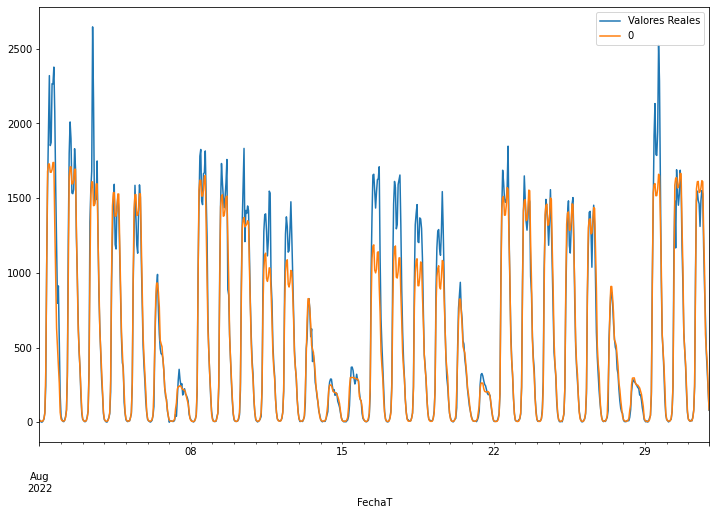

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
y_test.plot(ax=ax, label="Valores Reales")
y_predd.plot(ax=ax, label="RandomForest") #,color = "orange"


ax.legend()
fig.show()

# LGBMRegressor

In [ ]:
# Modelado y Forecasting
# ==============================================================================
#%matplotlib inline
#%pip install xgboost
#%pip install lightgbm
#%pip install catboost
#%pip install skforecast
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from joblib import dump, load

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

https://www.cienciadedatos.net/documentos/py39-forecasting-series-temporales-con-skforecast-xgboost-lightgbm-catboost.html


In [ ]:
# Crear forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = LGBMRegressor(random_state=123),
                lags = 24
             )

forecaster

In [ ]:
# Grid search de hiperparámetros
# ==============================================================================
# Hiperparámetros del regresor
param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1]
}

# Lags utilizados como predictores
lags_grid = [72, [1, 2, 3, 23, 24, 25, 71, 72, 73]]

resultados_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = datos.loc[:fin_validacion, 'users'],
                        exog               = datos.loc[:fin_validacion, variables_exogenas],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = 36,
                        refit              = False,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(datos_train)),
                        return_best        = True,
                        verbose            = False
                   )

In [ ]:
# Resultados Grid Search
# ==============================================================================
resultados_grid.head(10)

In [ ]:
# Backtesting
# ==============================================================================
metric, predicciones = backtesting_forecaster(
    forecaster         = forecaster,
    y                  = datos['users'],
    exog               = datos[variables_exogenas],
    initial_train_size = len(datos.loc[:fin_validacion]),
    steps              = 36,
    refit              = False,
    metric             = 'mean_squared_error',
    verbose            = False
    
)

print(f"Error de backtest: {metric:.2f}")

In [ ]:
# Importancia predictores
# ==============================================================================
impotancia = forecaster.get_feature_importance()
impotancia